In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail = pd.read_csv('OnlineRetail.csv')

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
type_counts = retail['Country'].value_counts()
Country=pd.DataFrame(type_counts)
Country.head()

,Country
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain')])

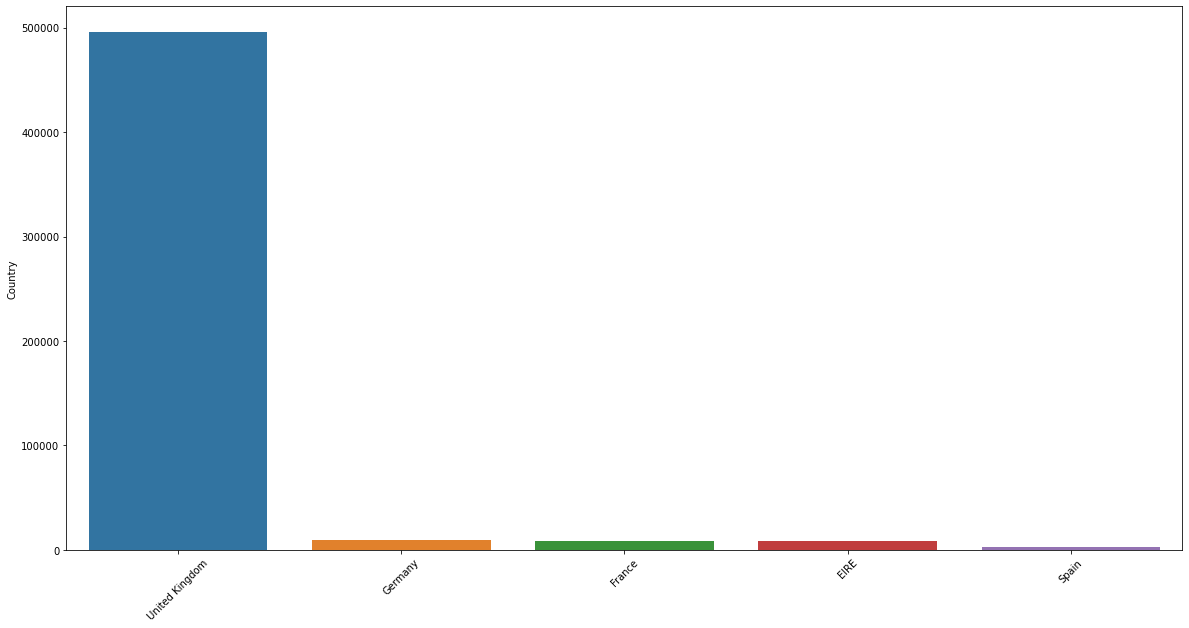

In [6]:
plt.figure(figsize=(20,10))
Country=Country.head()
ax = sns.barplot(y='Country',x=Country.index, data=Country.head())
plt.xticks(rotation=45)

In [25]:
retail=retail[retail['Country']=='France']
retail.shape

(8557, 8)

In [26]:
df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo      0.00
StockCode      0.00
Description    0.00
Quantity       0.00
InvoiceDate    0.00
UnitPrice      0.00
CustomerID     0.77
Country        0.00
dtype: float64

In [27]:
retail = retail.dropna()
retail.shape

(8491, 8)

In [28]:
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [29]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [30]:
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [31]:
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,373 days 04:05:00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,373 days 04:05:00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,373 days 04:05:00
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,373 days 04:05:00
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,373 days 04:05:00


In [32]:
rfm_r = retail.groupby('CustomerID')['Diff'].min().reset_index()
rfm_r.head()

,CustomerID,Diff
0,12413.0,66 days 03:50:00
1,12437.0,1 days 01:15:00
2,12441.0,366 days 02:05:00
3,12488.0,9 days 04:00:00
4,12489.0,335 days 23:37:00


In [33]:
rfm_r['Diff'] = rfm_r['Diff'].dt.days
rfm_r.columns = ['CustomerID','Recency']
rfm_r.head()

,CustomerID,Recency
0,12413.0,66
1,12437.0,1
2,12441.0,366
3,12488.0,9
4,12489.0,335


In [34]:
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count().reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12413.0,40
1,12437.0,201
2,12441.0,11
3,12488.0,55
4,12489.0,15


In [35]:
retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum().reset_index()
rfm_m.head()

,CustomerID,Amount
0,12413.0,694.15
1,12437.0,4896.66
2,12441.0,173.55
3,12488.0,1298.66
4,12489.0,334.93


In [36]:
rfm = rfm_r.merge(rfm_f,how='inner',on=['CustomerID'])
rfm =rfm.merge(rfm_m,how='inner',on=['CustomerID'])
rfm.head()

,CustomerID,Recency,Frequency,Amount
0,12413.0,66,40,694.15
1,12437.0,1,201,4896.66
2,12441.0,366,11,173.55
3,12488.0,9,55,1298.66
4,12489.0,335,15,334.93


Text(0.5, 0, 'Attributes')

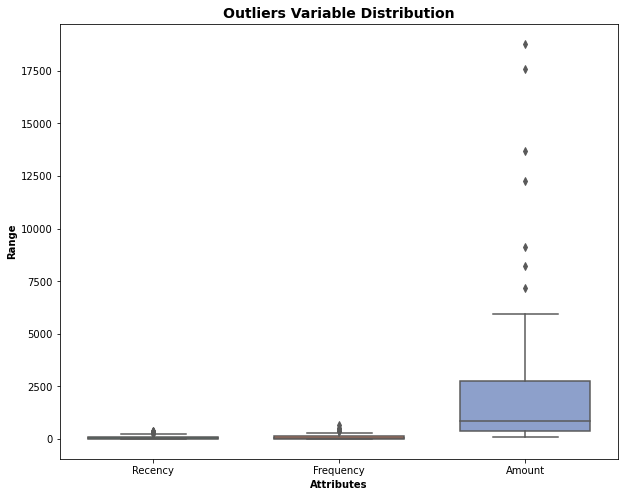

In [37]:
attributes = ['Recency','Frequency','Amount',]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [38]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [39]:
# Rescaling the attributes
import sklearn
from sklearn.preprocessing import StandardScaler

rfm_df = rfm[['Recency','Frequency', 'Amount']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(87, 3)

In [40]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.186794,-0.477974,-0.444391
1,-0.768467,0.858083,0.747476
2,2.497851,-0.718631,-0.592037
3,-0.696876,-0.353497,-0.272947
4,2.220438,-0.685437,-0.546269
